# KNN - Lung caner prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [6]:
data=pd.read_csv('data/lung_cancer_examples (2).csv')
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [10]:
data.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [12]:
data.isna().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [16]:
data.duplicated().sum()

0

### Correlation Analysis

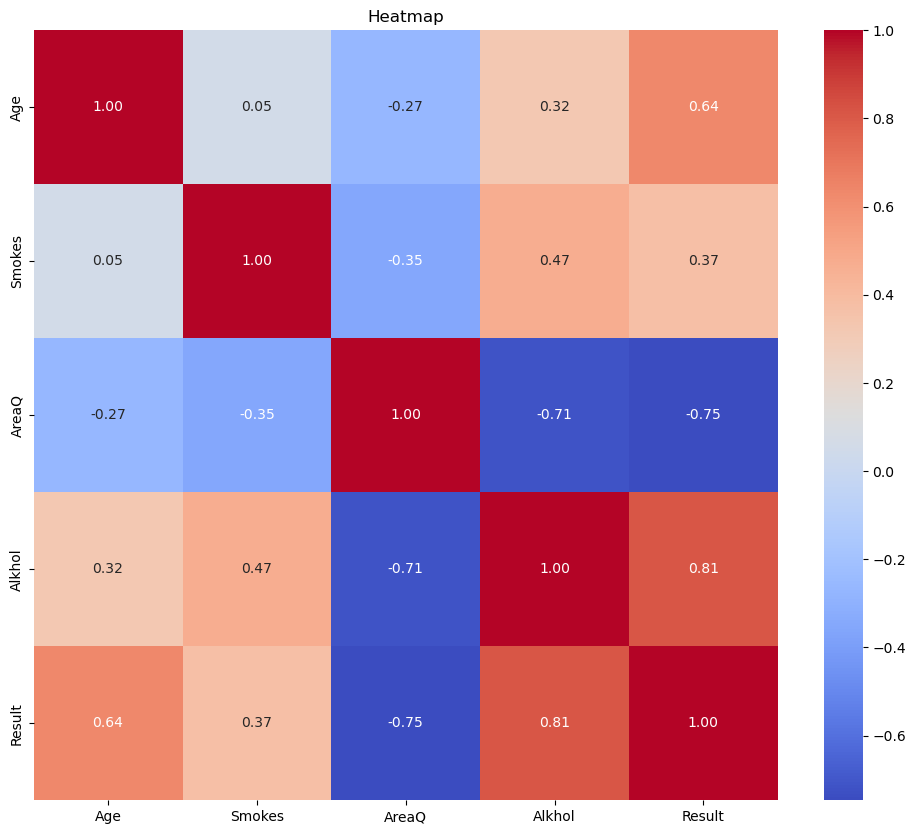

In [44]:
correlation_matrix = data[['Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",cbar=True)
plt.title("Heatmap")
plt.show()

### Splitting X & Y

In [24]:
X = data[['Age', 'Smokes', 'AreaQ', 'Alkhol']]  
y = data['Result'] 

### Scaling

In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sd=StandardScaler()
X_fit=sd.fit_transform(X)
X_fit

array([[-0.47382073, -1.52435619, -0.08332128,  0.32314781],
       [-0.97080603,  0.62301636, -1.31231015,  0.74683049],
       [-0.78443655, -1.90330429, -0.08332128, -0.52421755],
       [-0.90868287, -1.90330429,  1.14566759, -0.94790023],
       [ 1.57624364, -1.39804016, -0.08332128,  1.17051317],
       [-0.5359439 , -1.90330429,  1.96499351, -1.37158291],
       [ 0.95501201, -0.0085638 ,  1.96499351, -1.37158291],
       [-1.28142185, -0.3875119 , -0.08332128, -0.52421755],
       [ 0.14741089, -1.65067222,  0.32634168, -1.37158291],
       [ 0.58227303,  0.3703843 , -0.49298424,  0.74683049],
       [-0.59806706, -1.39804016,  1.14566759, -1.37158291],
       [-1.5299145 , -0.64014396,  0.32634168, -0.10053487],
       [-1.09505236, -1.65067222, -0.08332128, -0.94790023],
       [-0.90868287,  0.62301636, -1.31231015,  2.01787853],
       [-0.5359439 ,  1.25459653, -0.49298424,  2.01787853],
       [-0.22532808,  0.3703843 ,  1.14566759, -0.94790023],
       [-0.03895859,  0.

### Spliting into test data and train data

In [215]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_fit,y,test_size=0.79,random_state=42)

### KNN

In [217]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

### Accuracy

In [219]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

97.87234042553192

### Confusion_matrix -  Classification_report

In [115]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[8 0]
 [1 9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



### DataFrame of predicted value v/s actual value

In [117]:
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_comparison)

    Actual  Predicted
46       0          0
29       1          1
35       0          0
56       1          1
23       0          0
48       1          1
28       1          1
0        1          0
30       0          0
1        1          1
54       0          0
53       0          0
9        1          1
10       0          0
13       1          1
27       0          0
55       1          1
36       1          1


### Plotting Graph of predicted value v/s actual value

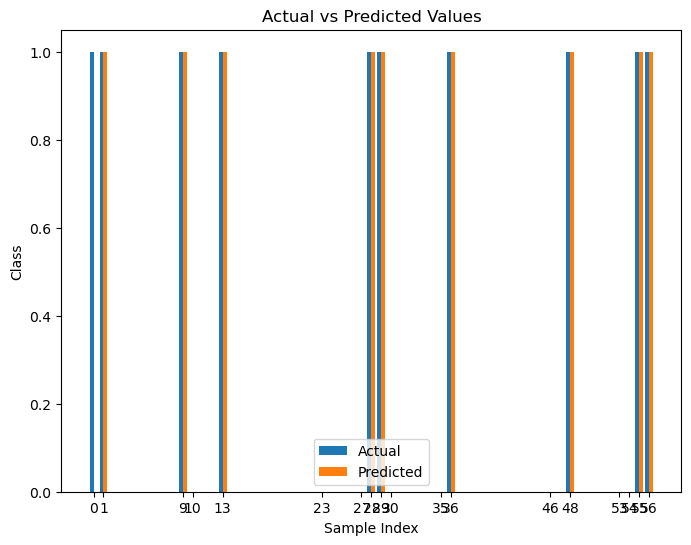

In [119]:
plt.figure(figsize=(8, 6))
plt.bar(df_comparison.index - 0.2, df_comparison['Actual'], width=0.4, label='Actual', align='center')
plt.bar(df_comparison.index + 0.2, df_comparison['Predicted'], width=0.4, label='Predicted', align='center')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Actual vs Predicted Values')
plt.xticks(df_comparison.index) 
plt.legend()
plt.show()

In [120]:
#END